<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/MP/blob/main/Mp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
print(tf.__version__)

2.8.0


In [5]:
np.random.seed(19)

In [7]:
df=pd.read_csv("combinedSample_GoldDs.csv")

In [9]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,14.03.2021 22:00:00.000 GMT-0000,1727.188,1729.078,1727.068,1728.258,64608.9986,1727.662,1730.222,1727.646,1729.522,61275.0016
1,14.03.2021 22:01:00.000 GMT-0000,1728.425,1729.821,1728.415,1729.424,71534.9987,1729.522,1730.421,1729.442,1730.405,80849.9977
2,14.03.2021 22:02:00.000 GMT-0000,1729.468,1730.298,1729.404,1730.118,38320.0012,1730.405,1730.611,1730.275,1730.545,59829.9988
3,14.03.2021 22:03:00.000 GMT-0000,1730.118,1730.304,1728.971,1729.141,26130.0001,1730.535,1730.625,1729.425,1729.765,36355.0000
4,14.03.2021 22:04:00.000 GMT-0000,1729.141,1729.431,1728.318,1728.708,30500.0003,1729.676,1729.862,1728.835,1729.219,49090.0017


In [10]:
df["Open"]=(df["Open_Bid"]+df["Open_Ask"])/2
df["High"]=(df["High_Bid"]+df["High_Ask"])/2
df["Low"]=(df["Low_Bid"]+df["Low_Ask"])/2
df["Close"]=(df["Close_Bid"]+df["Close_Ask"])/2

In [12]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Open,High,Low,Close
0,14.03.2021 22:00:00.000 GMT-0000,1727.188,1729.078,1727.068,1728.258,64608.9986,1727.662,1730.222,1727.646,1729.522,61275.0016,1727.4250,1729.6500,1727.3570,1728.8900
1,14.03.2021 22:01:00.000 GMT-0000,1728.425,1729.821,1728.415,1729.424,71534.9987,1729.522,1730.421,1729.442,1730.405,80849.9977,1728.9735,1730.1210,1728.9285,1729.9145
2,14.03.2021 22:02:00.000 GMT-0000,1729.468,1730.298,1729.404,1730.118,38320.0012,1730.405,1730.611,1730.275,1730.545,59829.9988,1729.9365,1730.4545,1729.8395,1730.3315
3,14.03.2021 22:03:00.000 GMT-0000,1730.118,1730.304,1728.971,1729.141,26130.0001,1730.535,1730.625,1729.425,1729.765,36355.0000,1730.3265,1730.4645,1729.1980,1729.4530
4,14.03.2021 22:04:00.000 GMT-0000,1729.141,1729.431,1728.318,1728.708,30500.0003,1729.676,1729.862,1728.835,1729.219,49090.0017,1729.4085,1729.6465,1728.5765,1728.9635


In [20]:
data=df.drop(['Local time','Open_Bid','High_Bid','Low_Bid','Close_Bid','Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)

In [21]:
data.head()

,Volume_Bid,Volume_Ask,Open,High,Low,Close
0,64608.9986,61275.0016,1727.4250,1729.6500,1727.3570,1728.8900
1,71534.9987,80849.9977,1728.9735,1730.1210,1728.9285,1729.9145
2,38320.0012,59829.9988,1729.9365,1730.4545,1729.8395,1730.3315
3,26130.0001,36355.0000,1730.3265,1730.4645,1729.1980,1729.4530
4,30500.0003,49090.0017,1729.4085,1729.6465,1728.5765,1728.9635


In [23]:
data=(data-data.min())/(data.max()-data.min())

In [24]:
data.head()

,Volume_Bid,Volume_Ask,Open,High,Low,Close
0,0.021363,0.038988,0.125967,0.130772,0.137818,0.140713
1,0.023653,0.051443,0.129923,0.131973,0.141810,0.143297
2,0.012671,0.038068,0.132383,0.132824,0.144124,0.144349
3,0.008640,0.023132,0.133379,0.132849,0.142495,0.142133
4,0.010085,0.031235,0.131034,0.130764,0.140916,0.140899


In [26]:
np.random.seed(19)

In [28]:
print(data.head(n=5))
print(data[-5:])

   Volume_Bid  Volume_Ask      Open      High       Low     Close
0    0.021363    0.038988  0.125967  0.130772  0.137818  0.140713
1    0.023653    0.051443  0.129923  0.131973  0.141810  0.143297
2    0.012671    0.038068  0.132383  0.132824  0.144124  0.144349
3    0.008640    0.023132  0.133379  0.132849  0.142495  0.142133
4    0.010085    0.031235  0.131034  0.130764  0.140916  0.140899
        Volume_Bid  Volume_Ask      Open      High       Low     Close
371274    0.003809    0.012897  0.785339  0.786228  0.793662  0.789447
371275    0.003402    0.015334  0.786724  0.788796  0.794671  0.793563
371276    0.001270    0.002914  0.790729  0.790754  0.798524  0.795500
371277    0.001746    0.007565  0.792612  0.790772  0.800340  0.794850
371278    0.001696    0.004352  0.792190  0.791118  0.800259  0.795753


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371279 entries, 0 to 371278
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Volume_Bid  371279 non-null  float64
 1   Volume_Ask  371279 non-null  float64
 2   Open        371279 non-null  float64
 3   High        371279 non-null  float64
 4   Low         371279 non-null  float64
 5   Close       371279 non-null  float64
dtypes: float64(6)
memory usage: 17.0 MB


In [30]:
data['Volume_Bid']=pd.to_numeric(data['Volume_Bid'],downcast='float')
data['Volume_Ask']=pd.to_numeric(data['Volume_Ask'],downcast='float')
data['Open']=pd.to_numeric(data['Open'],downcast='float')
data['High']=pd.to_numeric(data['High'],downcast='float')
data['Low']=pd.to_numeric(data['Low'],downcast='float')
data['Close']=pd.to_numeric(data['Close'],downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371279 entries, 0 to 371278
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Volume_Bid  371279 non-null  float32
 1   Volume_Ask  371279 non-null  float32
 2   Open        371279 non-null  float32
 3   High        371279 non-null  float32
 4   Low         371279 non-null  float32
 5   Close       371279 non-null  float32
dtypes: float32(6)
memory usage: 8.5 MB


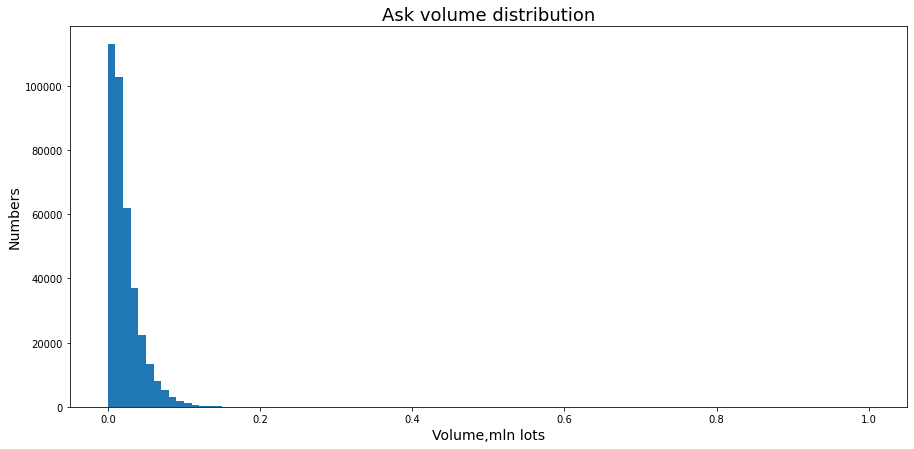

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Ask volume distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume,mln lots',size=14);

In [33]:
n=data.shape[0]
p=data.shape[1]

n_small=250000
data_a=np.array(data[:n_small])
print("data_a:")
print(data_a[:4])
print('\n')
print(data_a[-4:])
print('\n',"Tick number in the DataFrame: n_small=",n_small,'\n')
print("numpy size:                                =",data_a.shape)

data_a:
[[0.02136336 0.03898769 0.12596732 0.13077244 0.1378183  0.14071327]
 [0.02365348 0.05144275 0.12992284 0.13197334 0.14181007 0.14329727]
 [0.01267074 0.03806827 0.13238275 0.13282366 0.1441241  0.14434902]
 [0.00864004 0.02313174 0.13337897 0.13284916 0.14249463 0.14213327]]


[[0.00282711 0.0050202  0.4754246  0.47436056 0.48540077 0.48249093]
 [0.00341568 0.00419941 0.47587925 0.47462827 0.48590878 0.48271793]
 [0.00231459 0.00283778 0.476173   0.47467926 0.4859469  0.4827053 ]
 [0.00303542 0.00494385 0.47602487 0.4748501  0.4860612  0.48278603]]

 Tick number in the DataFrame: n_small= 250000 

numpy size:                                = (250000, 6)


In [34]:
data=[]
data

[]

In [35]:
N=50
L=n_small-N
print('Size of a three-dimensional data tensor: ',L,N,6)

Size of a three-dimensional data tensor:  249950 50 6


In [36]:
from tqdm import tqdm

In [37]:
data_b=np.zeros((L,N,6),dtype='float32')
Y=np.zeros((L,2),dtype='float32')

In [39]:
print('n_small-N=',n_small-N)

n_small-N= 249950


In [40]:
print('n_small-N=',n_small-N)
for k in tqdm(range(n_small-N)):
    data_b[k,:,:]=data_a[k:k+N,:]
    Y[k,0]=data_a[k+N,3]
    Y[k,1]=data_a[k+N,1]
print(k)
print('data_b:','\n',data_b)
print("Numpy size:",data_b.shape,'\n')
print(Y[:5,:])
print(Y[-10:,:])
print("Numpy size:",Y.shape)

n_small-N= 249950


100%|██████████| 249950/249950 [00:01<00:00, 206694.50it/s]


249949
data_b: 
 [[[0.02136336 0.03898769 0.12596732 0.13077244 0.1378183  0.14071327]
  [0.02365348 0.05144275 0.12992284 0.13197334 0.14181007 0.14329727]
  [0.01267074 0.03806827 0.13238275 0.13282366 0.1441241  0.14434902]
  ...
  [0.01228387 0.01943817 0.12703635 0.12626846 0.13735728 0.13696404]
  [0.00335285 0.0058919  0.12589963 0.12541433 0.13777131 0.13683793]
  [0.00501605 0.00699265 0.12576425 0.12498087 0.13689499 0.13616954]]

 [[0.02365348 0.05144275 0.12992284 0.13197334 0.14181007 0.14329727]
  [0.01267074 0.03806827 0.13238275 0.13282366 0.1441241  0.14434902]
  [0.00864004 0.02313174 0.13337897 0.13284916 0.14249463 0.14213327]
  ...
  [0.00335285 0.0058919  0.12589963 0.12541433 0.13777131 0.13683793]
  [0.00501605 0.00699265 0.12576425 0.12498087 0.13689499 0.13616954]
  [0.01111005 0.01969904 0.1251333  0.12466217 0.13600594 0.13570294]]

 [[0.01267074 0.03806827 0.13238275 0.13282366 0.1441241  0.14434902]
  [0.00864004 0.02313174 0.13337897 0.13284916 0.14249463

In [41]:
data_a=[]
data_a

[]

In [42]:
import random 
pp=random.randint(10,n_small-N-1)
print('random int = ',pp)
print('\t','data_b:','\t\t\t','Bid','\t\t\t','Ask')
for i in range(7):
    print(data_b[pp+i,N-1,3],'\t\t',data_b[pp+i,N-1,1],'\t\t',Y[pp+i,0],'\t\t',Y[pp+i,1])

random int =  75854
	 data_b: 			 Bid 			 Ask
0.5501583 		 0.08559793 		 0.5535456 		 0.069404766
0.5535456 		 0.069404766 		 0.5524365 		 0.05529857
0.5524365 		 0.05529857 		 0.5545782 		 0.06473452
0.5545782 		 0.06473452 		 0.5545017 		 0.040263418
0.5545017 		 0.040263418 		 0.55333775 		 0.028460534
0.55333775 		 0.028460534 		 0.5523944 		 0.04891038
0.5523944 		 0.04891038 		 0.5514676 		 0.04860497


In [44]:
print('\t','\t Max Min')
mnx=data_b[:,:,0].max()
mmn=data_b[:,:,0].min()
print('Volume_bid','\t',mnx,'\t',mmn)
mnx=data_b[:,:,1].max()
mmn=data_b[:,:,1].min()
print('Volume_Ask','\t',mnx,'\t',mmn)
mnx=data_b[:,:,2].max()
mmn=data_b[:,:,2].min()
print('Open','\t',mnx,'\t',mmn)
mnx=data_b[:,:,3].max()
mmn=data_b[:,:,3].min()
print('High','\t',mnx,'\t',mmn)
mnx=data_b[:,:,4].max()
mmn=data_b[:,:,4].min()
print('Low','\t',mnx,'\t',mmn)
mnx=data_b[:,:,5].max()
mmn=data_b[:,:,5].min()
print('Close','\t',mnx,'\t',mmn)

	 	 Max Min
Volume_bid 	 1.0 	 0.0
Volume_Ask 	 0.8096268 	 0.0
Open 	 0.6091484 	 0.0
High 	 0.6074927 	 0.0
Low 	 0.61729175 	 0.0
Close 	 0.61402845 	 0.0


In [45]:
train_start=0
train_end=int(np.floor(0.9*L))
print(L,train_end)

249950 224955


In [46]:
train_end_=4955
print(train_end)

224955


In [47]:
test_start=train_end+1
test_end=L
print(test_start,test_end)

224956 249950


In [48]:
print(test_end-train_end)

24995


In [52]:
X_train=np.zeros((train_end,N,6),dtype='float32')
X_test=np.zeros((test_end-train_end,N,6),dtype='float32')
for z in tqdm(range(test_end)):
    if z<train_end:
        X_train[z,:,:]=data_b[z,:,:]
    else:
        X_test[z-train_end,:,:]=data_b[z,:,:]
print('\n',"X_train:",X_train.shape,'\n')
print("X_test:",X_test.shape,'\n')

100%|██████████| 249950/249950 [00:00<00:00, 533256.23it/s]


 X_train: (224955, 50, 6) 

X_test: (24995, 50, 6) 



In [54]:
print(X_train[:5,N-1,:])
print(X_train[-5:,N-1,:],'\n')
print(X_test[:5,N-1,:])
print(X_test[-5:,N-1,:])

[[0.00501605 0.00699265 0.12576425 0.12498087 0.13689499 0.13616954]
 [0.01111005 0.01969904 0.1251333  0.12466217 0.13600594 0.13570294]
 [0.01439015 0.02555913 0.12466074 0.12425422 0.13617106 0.13584165]
 [0.01003541 0.01736392 0.12476292 0.12463667 0.13666637 0.13653526]
 [0.00501605 0.00780072 0.12542707 0.12495538 0.13715407 0.13676226]]
[[0.00887812 0.01580505 0.26078188 0.26054287 0.271796   0.27100232]
 [0.00884836 0.01529603 0.26165038 0.26128992 0.27267486 0.27145883]
 [0.00817051 0.01626953 0.26213828 0.26139957 0.27313715 0.27170855]
 [0.00742323 0.01518786 0.26238605 0.2618636  0.27316254 0.27131256]
 [0.00485073 0.00982407 0.2620029  0.261833   0.27319303 0.27153197]] 

[[0.00611714 0.01140839 0.26225322 0.26131034 0.27260372 0.27107295]
 [0.00809446 0.01952089 0.2617679  0.26211092 0.27273074 0.27196077]
 [0.00862351 0.01754207 0.26274112 0.26254818 0.27335814 0.2728183 ]
 [0.00994614 0.02914135 0.2634768  0.263526   0.2747298  0.2733732 ]
 [0.00719838 0.01757389 0.2640

In [55]:
y_train=Y[np.arange(train_start,train_end),:]
y_test=Y[np.arange(test_start,L),:]

print(train_start,train_end,test_start,L,'\n')
print('y_train(first 10):','\n',y_train[:10,:])

data_add_row=np.array([y_test[L-test_start-1,0],y_test[L-test_start-1,1]])
print(L-test_start-1,data_add_row)
y_test=np.vstack([y_test,data_add_row])

print('y_test(last 10:)','\n',y_test[-10:,:])

0 224955 224956 249950 

y_train(first 10): 
 [[0.12466217 0.01969904]
 [0.12425422 0.02555913]
 [0.12463667 0.01736392]
 [0.12495538 0.00780072]
 [0.12476926 0.00845608]
 [0.12492988 0.01022492]
 [0.1274821  0.02297585]
 [0.12738138 0.00999586]
 [0.12713917 0.01510514]
 [0.12679496 0.01114116]]
24993 [0.4748501  0.00494385]
y_test(last 10:) 
 [[0.47528353 0.0085388 ]
 [0.47480673 0.00974135]
 [0.47493932 0.0144816 ]
 [0.47482458 0.00846244]
 [0.47445488 0.00785162]
 [0.47436056 0.0050202 ]
 [0.47462827 0.00419941]
 [0.47467926 0.00283778]
 [0.4748501  0.00494385]
 [0.4748501  0.00494385]]


In [56]:
print('Data for training')
print("X_train")
print("Type:", X_train.dtype, type(X_train),":Size:",X_train.shape)

print("\n","y_train")
print("Type:",y_train.dtype,type(y_train),":size:",y_train.shape)

print('Data for testing')
print("X_test")
print("Type:",X_test.dtype, type(X_test),":Size:",X_test.shape)

print("\n","y_test")
print("Type:",y_test.dtype,type(y_test),":size:",y_test.shape)

Data for training
X_train
Type: float32 <class 'numpy.ndarray'> :Size: (224955, 50, 6)

 y_train
Type: float32 <class 'numpy.ndarray'> :size: (224955, 2)
Data for testing
X_test
Type: float32 <class 'numpy.ndarray'> :Size: (24995, 50, 6)

 y_test
Type: float32 <class 'numpy.ndarray'> :size: (24995, 2)


In [57]:
import tensorflow as tf
from tensorflow import keras

In [66]:
model=keras.Sequential([
    keras.layers.Conv1D(50,9,padding='same',input_shape=(50,6),activation=tf.nn.relu,kernel_initializer="normal"),
    keras.layers.MaxPooling1D(7),
    keras.layers.Conv1D(100,7,padding='same',activation=tf.nn.relu,kernel_initializer='normal'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(25,activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.Dense(2)
    
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 50, 50)            2750      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 7, 50)            0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 7, 100)            35100     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 25)                2525      
                                                                 
 dense_4 (Dense)             (None, 2)                

In [67]:
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [68]:
history=model.fit(X_train,y_train,batch_size=30,epochs=10,validation_split=0.2,shuffle=True,verbose=1)

Epoch 1/10
5999/5999 [==============================] - 55s 9ms/step - loss: 9.7340e-05 - mae: 0.0052 - val_loss: 3.2956e-05 - val_mae: 0.0032
Epoch 2/10
5999/5999 [==============================] - 50s 8ms/step - loss: 5.6593e-05 - mae: 0.0043 - val_loss: 3.1730e-05 - val_mae: 0.0031
Epoch 3/10
5999/5999 [==============================] - 44s 7ms/step - loss: 5.4356e-05 - mae: 0.0041 - val_loss: 3.0990e-05 - val_mae: 0.0029
Epoch 4/10
5999/5999 [==============================] - 54s 9ms/step - loss: 5.3072e-05 - mae: 0.0040 - val_loss: 3.5275e-05 - val_mae: 0.0036
Epoch 5/10
5999/5999 [==============================] - 53s 9ms/step - loss: 5.2827e-05 - mae: 0.0039 - val_loss: 3.0976e-05 - val_mae: 0.0031
Epoch 6/10
5999/5999 [==============================] - 53s 9ms/step - loss: 5.2210e-05 - mae: 0.0039 - val_loss: 3.4928e-05 - val_mae: 0.0034
Epoch 7/10
5999/5999 [==============================] - 55s 9ms/step - loss: 5.1681e-05 - mae: 0.0039 - val_loss: 3.2409e-05 - val_mae: 0.0034

In [69]:
mse,mae=model.evaluate(X_test,y_test,verbose=0)
print("Mean absolute error : %.3f%%"%(mae*100))

Mean absolute error : 0.390%


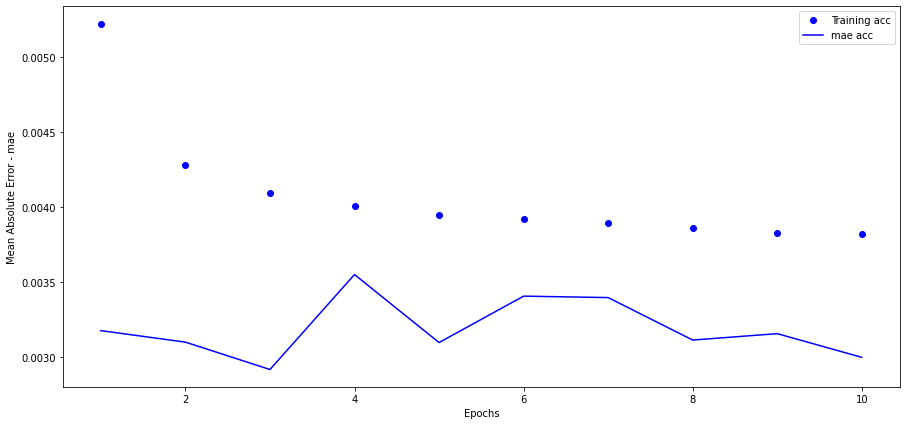

In [70]:
history_dict=history.history

mean_absolute_error_values=history_dict['mae']

val_mean_absolute_error_values=history_dict['val_mae']

epochs=range(1,len(mean_absolute_error_values)+1)
plt.figure(num=1,figsize=(15,7))
plt.plot(epochs,mean_absolute_error_values,'bo',label='Training acc')
plt.plot(epochs,val_mean_absolute_error_values,'b',label='mae acc')
plt.xlabel('Epochs')
plt.ylabel("Mean Absolute Error - mae")
plt.legend()
plt.show()

In [71]:
pred=model.predict(X_test)

NameError: ignored

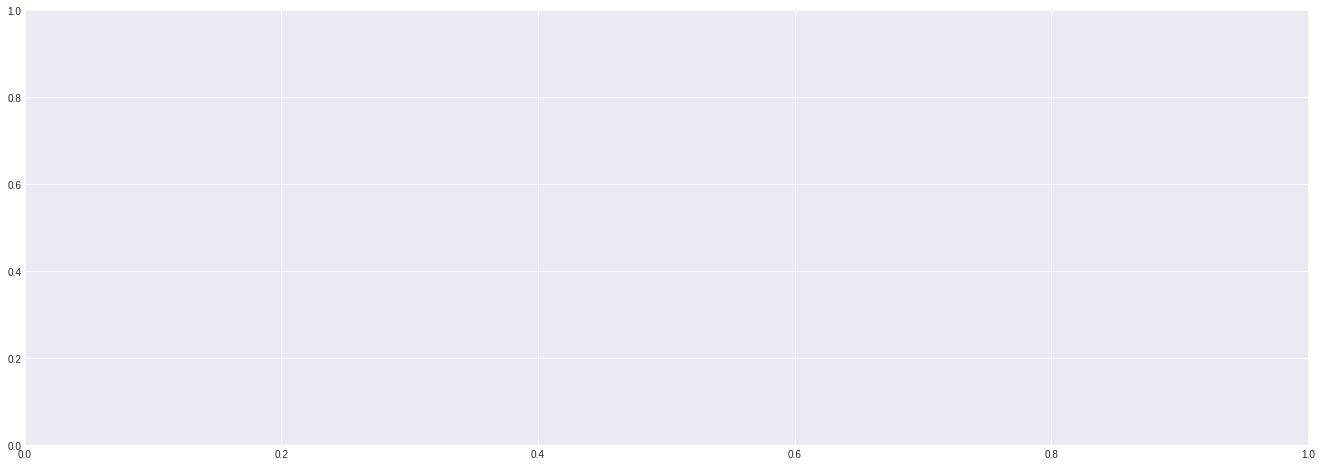

In [72]:
plt.style.use('seaborn-darkgrid')
plt.ion()
fig=plt.figure(figsize=(23,8))
axl=fig.add_subplot(111)
line1=ax1.plot(y_test[:400,0],label='bid')
line2=ax1.plot(pred[:400,0],label='Predicted Bid')
line3=ax1.plot(y_test[0:400,1],label='Ask')
line4=ax1,plot(pred[:400,1],label='Predicted Ask')

plt.title('Predicted Normalized prices',size=18)
plt.ylabel('Price',size=14)
plt.xlabel('$Ticks$',size=14)
plt.legend(loc='upper right')

plt.show()